## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

import optuna

c:\Users\Aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data information

In [3]:
data = pd.read_csv("Movie_classification.csv")

In [4]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
data.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

We have missing values in **Time_taken** column.

# Data cleaning

There are very less missing values so we will just deleat the rows.

In [7]:
data1 = data.copy()

In [8]:
data1 = data1.dropna()
data1.reset_index(inplace=True,drop=True)

data1.isna().sum().sum()

0

There are no missing values now.

In [9]:
data1.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [10]:
target= data1["Start_Tech_Oscar"]

## EDA

In [11]:
data2 = data1.copy()

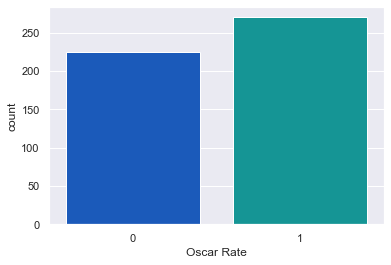

In [12]:
sns.countplot(x = target, palette= 'winter')
plt.xlabel("Oscar Rate");

Our data is evenly distributed. Atleast 200 are there in both choices.

<AxesSubplot:>

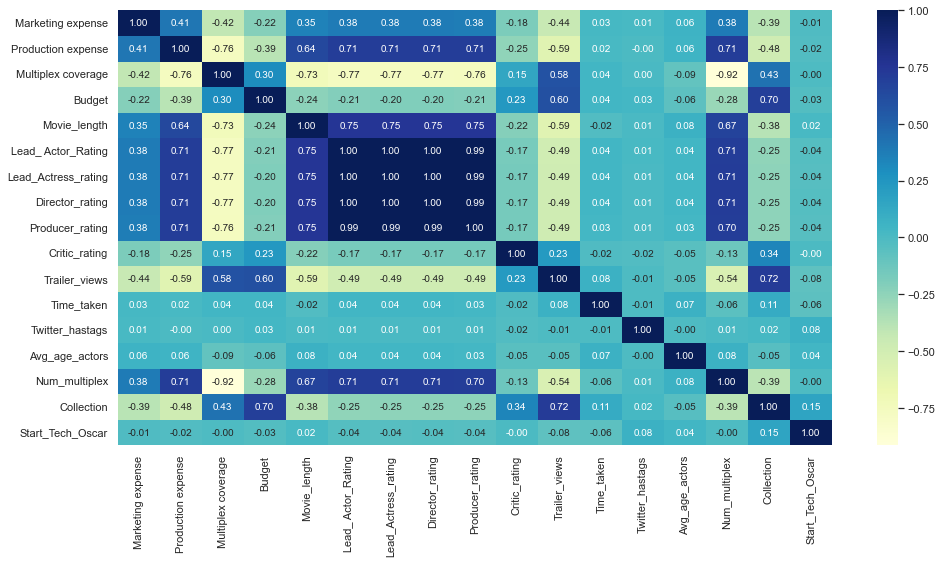

In [13]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

Observations:

1) `Lead_ Actor_Rating` , `Lead_Actress_rating` , `Director_rating` and `Producer_rating` are correlated features.

2) Creating a new feature from `Production expense` and `Marketing expense`.

3) Creating a new feature from `Collection` and `Budget`.

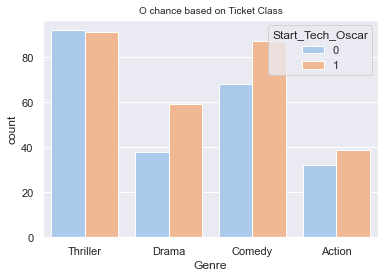

In [14]:
sns.countplot(x = 'Genre', data= data, hue= 'Start_Tech_Oscar', palette= 'pastel')
plt.title('O chance based on Ticket Class', fontsize = 10);

There are more chances of getting Oscar in Drama, Comedy and Action genre.

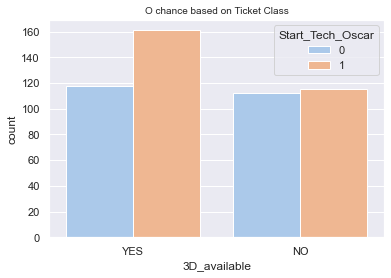

In [15]:
sns.countplot(x = '3D_available', data= data, hue= 'Start_Tech_Oscar', palette= 'pastel')
plt.title('O chance based on Ticket Class', fontsize = 10);

It is clear from the plot that if 3D is available the there is a chance of gatting Oscar.

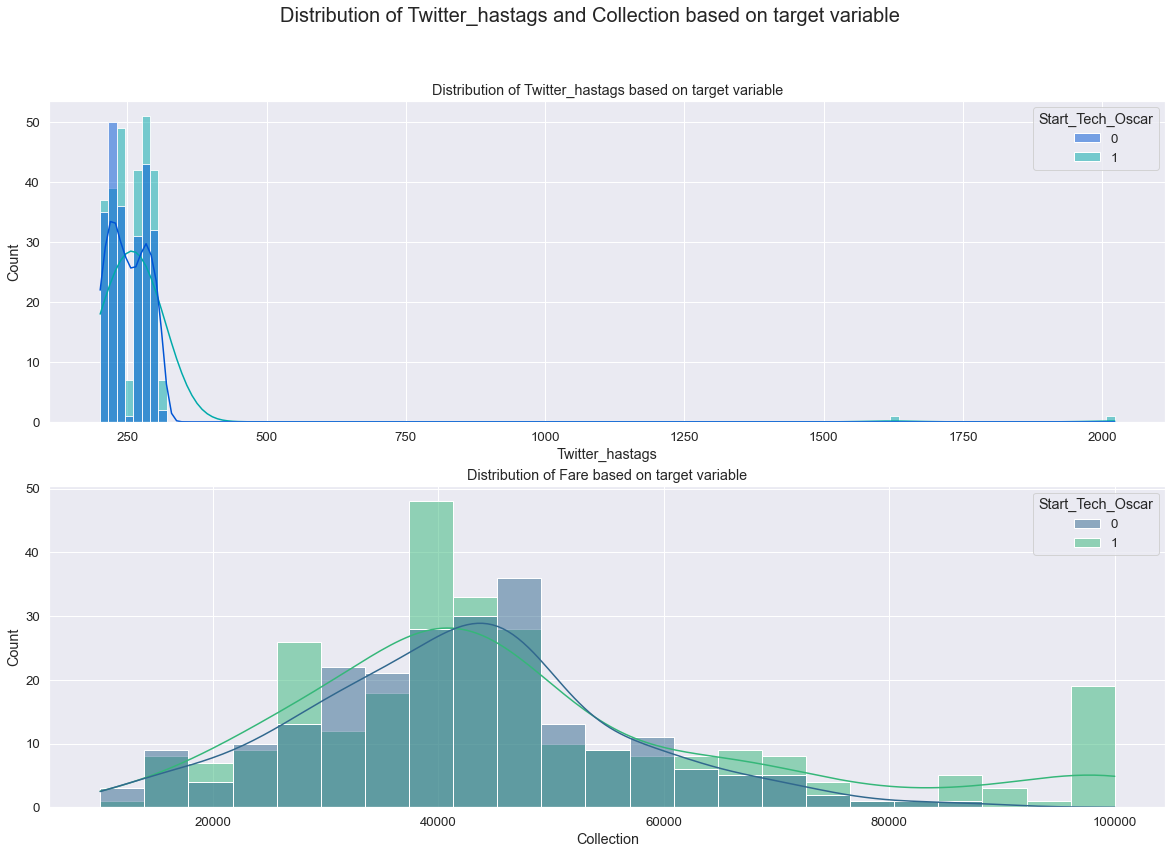

In [16]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, figsize = (20, 13))

plt.suptitle('Distribution of Twitter_hastags and Collection based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='Twitter_hastags', data= data, hue= 'Start_Tech_Oscar', kde= True, ax= ax[0], palette= 'winter')
ax1.set(xlabel = 'Twitter_hastags', title= 'Distribution of Twitter_hastags based on target variable')

ax2 = sns.histplot(x ='Collection', data= data, hue= 'Start_Tech_Oscar', kde= True, ax= ax[1], palette= 'viridis')
ax2.set(xlabel = 'Collection', title= 'Distribution of Fare based on target variable')

plt.show()

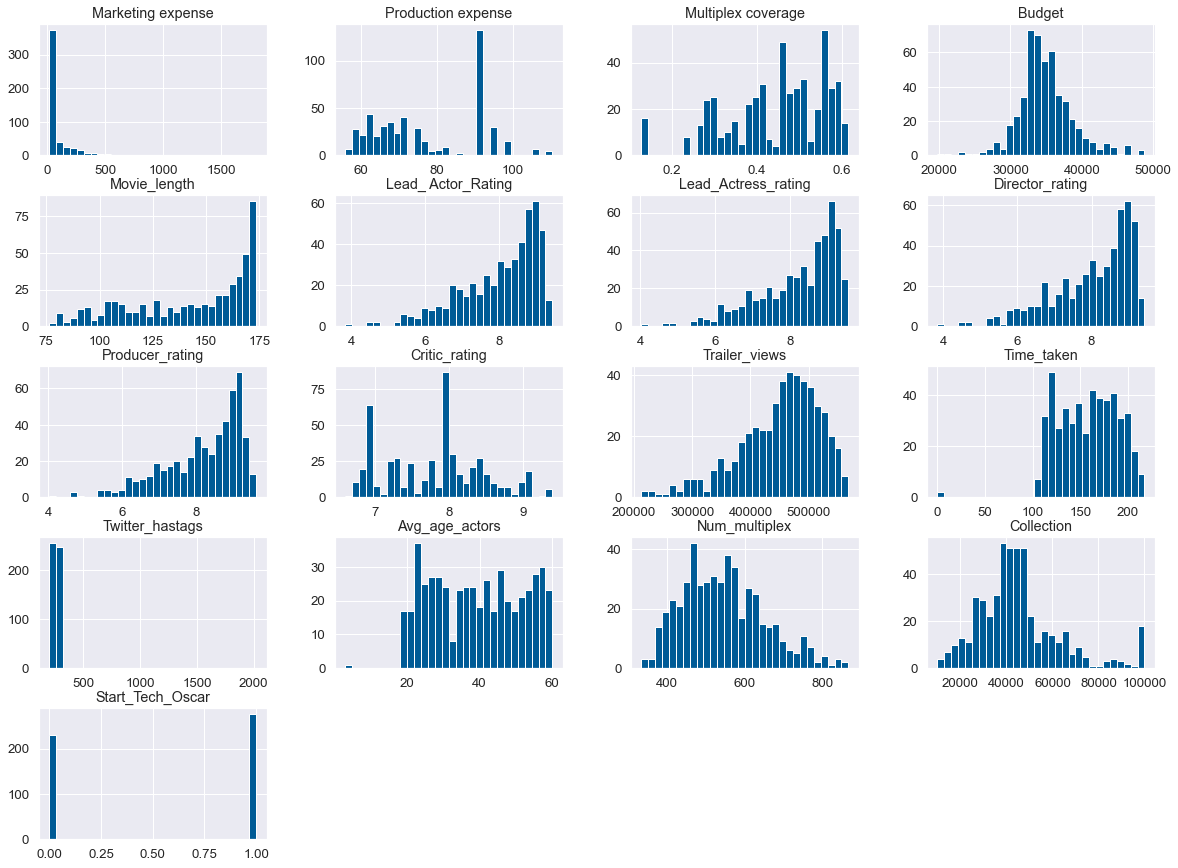

In [17]:
data.hist(bins = 30, figsize=(20, 15), color = '#005b96');

As we can see there are outliers in `Twitter_hastags`, `Marketing expense`, `Time_taken` and `Avg_age_actors`.

<AxesSubplot:xlabel='Twitter_hastags'>

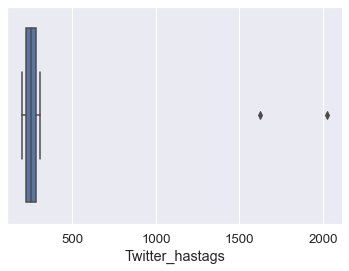

In [18]:
sns.boxplot(x=data["Twitter_hastags"])

<AxesSubplot:xlabel='Marketing expense'>

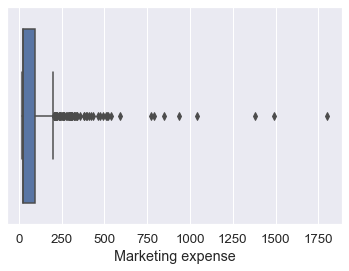

In [19]:
sns.boxplot(x=data["Marketing expense"])

<AxesSubplot:xlabel='Time_taken'>

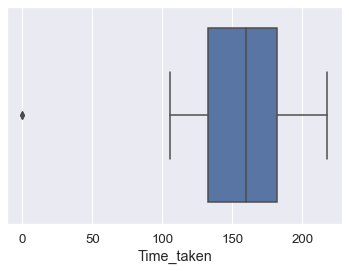

In [20]:
sns.boxplot(x=data["Time_taken"])

<AxesSubplot:xlabel='Avg_age_actors'>

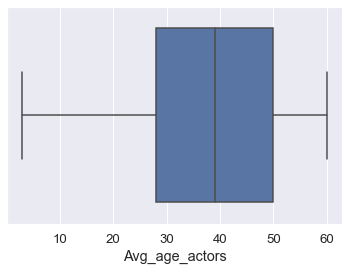

In [21]:
sns.boxplot(x=data["Avg_age_actors"])

## Feature engineering

In [22]:
data3 = data2.copy()

Creating new features from similar features.

In [23]:
data3["Expense"] = data3["Marketing expense"] + data3["Production expense"]
data3["Rating"] = data3["Lead_ Actor_Rating"] + data3["Lead_Actress_rating"] + data3["Director_rating"] + data3["Producer_rating"]


In [24]:
data4 = data3.copy()

Droping similar features from dataset.

In [25]:
data4 = data4.drop(["Marketing expense","Production expense","Lead_ Actor_Rating","Lead_Actress_rating","Director_rating","Producer_rating"],axis = 1)

Droping outliers.

In [26]:
data4.drop(data4[data4['Time_taken'] < 100].index, inplace = True)
data4.drop(data4[data4['Twitter_hastags'] > 500].index, inplace = True)

data4.reset_index(drop=True,inplace = True)

In [27]:
data4.head()

,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Expense,Rating
0,0.462,36524.125,138.7,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1,79.7464,31.825
1,0.531,35668.655,152.4,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0,89.6862,30.065
2,0.542,38873.890,119.3,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1,80.0074,27.870
3,0.542,39701.585,127.7,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1,80.7410,27.875
4,0.542,35718.650,132.2,7.26,498425,YES,143.48,284.592,Comedy,53,460,57400,0,79.9570,27.880


## Checking For Skewness

In [28]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Multiplex coverage,-0.736768,0.736768,True
1,Budget,0.386061,0.386061,False
2,Movie_length,-0.581770,0.581770,True
3,Critic_rating,0.137840,0.137840,False
4,Trailer_views,-0.879177,0.879177,True
5,Time_taken,-0.012897,0.012897,False
6,Twitter_hastags,-0.020841,0.020841,False
7,Avg_age_actors,-0.009889,0.009889,False
8,Num_multiplex,0.541919,0.541919,True
9,Collection,1.115652,1.115652,True


Total Charges column is clearly skewed as we also saw in the histogram, so lets apply log transformation to it.

In [29]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data4[column] = np.log1p(data4[column])

In [30]:
data4.head()

,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Expense,Rating
0,0.379805,36524.125,4.939497,7.94,13.175654,YES,109.60,223.840,Thriller,23,6.204558,10.778977,1,4.391313,3.491190
1,0.425921,35668.655,5.033049,7.44,13.110404,NO,146.64,243.456,Drama,42,6.137727,10.673619,0,4.507405,3.436082
2,0.433080,38873.890,4.789989,8.26,13.154405,YES,185.36,225.344,Drama,45,6.159095,11.109473,1,4.394541,3.362803
3,0.433080,39701.585,4.857484,8.26,13.183363,NO,176.48,225.792,Drama,55,5.981414,11.189975,1,4.403556,3.362976
4,0.433080,35718.650,4.891852,7.26,13.119210,YES,143.48,284.592,Comedy,53,6.133398,10.957817,0,4.393918,3.363149


## Encoding

In [31]:
data5=data4.copy()

In [32]:
data5 = pd.get_dummies(data5)

In [33]:
data5.head()

,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Expense,Rating,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,0.379805,36524.125,4.939497,7.94,13.175654,109.60,223.840,23,6.204558,10.778977,1,4.391313,3.491190,0,1,0,0,0,1
1,0.425921,35668.655,5.033049,7.44,13.110404,146.64,243.456,42,6.137727,10.673619,0,4.507405,3.436082,1,0,0,0,1,0
2,0.433080,38873.890,4.789989,8.26,13.154405,185.36,225.344,45,6.159095,11.109473,1,4.394541,3.362803,0,1,0,0,1,0
3,0.433080,39701.585,4.857484,8.26,13.183363,176.48,225.792,55,5.981414,11.189975,1,4.403556,3.362976,1,0,0,0,1,0
4,0.433080,35718.650,4.891852,7.26,13.119210,143.48,284.592,53,6.133398,10.957817,0,4.393918,3.363149,0,1,0,1,0,0


## Scaling

In [34]:
data6 = data5.copy()

In [35]:
sc = StandardScaler()
data6[data4.select_dtypes(np.number).columns] = sc.fit_transform(data6[data4.select_dtypes(np.number).columns])

In [36]:
data6.drop(["Start_Tech_Oscar"],axis =1, inplace = True)
data6.head()

,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Expense,Rating,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,0.173643,0.402450,0.000267,0.180195,0.998781,-1.629537,-0.920102,-1.307596,-0.410469,0.340594,-0.863030,-0.059366,0,1,0,0,0,1
1,0.726879,0.184281,0.431080,-0.580711,0.616224,-0.383424,-0.334914,0.209189,-0.759252,0.081224,-0.665773,-0.459068,1,0,0,0,1,0
2,0.812766,1.001707,-0.688232,0.667174,0.874197,0.919208,-0.875234,0.448682,-0.647733,1.154208,-0.857547,-0.990558,0,1,0,0,1,0
3,0.812766,1.212793,-0.377410,0.667174,1.043976,0.620464,-0.861870,1.246990,-1.575033,1.352388,-0.842229,-0.989302,1,0,0,0,1,0
4,0.812766,0.197032,-0.219144,-0.854637,0.667855,-0.489734,0.892264,1.087328,-0.781845,0.780861,-0.858605,-0.988046,0,1,0,1,0,0


## Splitting

In [37]:
data_f = data6.copy()

In [38]:
target = data4["Start_Tech_Oscar"]
target = target.astype(int)
target

0      1
1      0
2      1
3      1
4      0
      ..
485    0
486    0
487    0
488    0
489    0
Name: Start_Tech_Oscar, Length: 490, dtype: int32

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_f, target, test_size= 0.2, stratify= target, random_state= 42)

## Modeling

In [40]:
models = {
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightgbm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'random forest' : RandomForestClassifier(),
    'logistic regression': LogisticRegression(),
    'naive bayes': GaussianNB(),
}

In [41]:
for name, model in models.items():
    model.fit(data_f, target)
    print(f'{name} trained')

xgboost trained
catboost trained
lightgbm trained
gradient boosing trained
random forest trained
logistic regression trained
naive bayes trained


## Evaluation

In [42]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result


In [43]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
xgboost : 0.6695451590755803
----------------
catboost : 0.6811158640420317
----------------
lightgbm : 0.6913001618140264
----------------
gradient boosing : 0.6265832822322928
----------------
random forest : 0.6701598226882923
----------------
logistic regression : 0.679578130820088
----------------
naive bayes : 0.6156002207137622


Lightgbm and catboost are the most efficient models here!

## Hyperparameter Optimization

In [44]:
'''
def catboost_objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0, 0.5)
    depth = trial.suggest_int('depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    
    model = CatBoostClassifier(
        learning_rate= learning_rate,
        depth= depth,
        n_estimators= n_estimators,
        verbose= 0
    )

    model.fit(data_f, target)
    cv_score = cross_val_score(model, data_f, target, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(catboost_objective, n_trials= 100)
'''

"\ndef catboost_objective(trial):\n    learning_rate = trial.suggest_float('learning_rate', 0, 0.5)\n    depth = trial.suggest_int('depth', 3, 10)\n    n_estimators = trial.suggest_int('n_estimators', 50, 600)\n    \n    model = CatBoostClassifier(\n        learning_rate= learning_rate,\n        depth= depth,\n        n_estimators= n_estimators,\n        verbose= 0\n    )\n\n    model.fit(data_f, target)\n    cv_score = cross_val_score(model, data_f, target, scoring= 'roc_auc', cv= kf)\n\n    return np.mean(cv_score)\n\nstudy = optuna.create_study(direction= 'maximize')\nstudy.optimize(catboost_objective, n_trials= 100)\n"

In [46]:
#study.best_params

In [47]:
catboost_para = {
    'learning_rate': 0.2608976083773448, 
     'depth': 7, 
     'n_estimators': 67,
     'verbose':0
}

In [48]:
cb = CatBoostClassifier(**catboost_para)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

In [49]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred), 3))

ROC AUC Score: 0.635


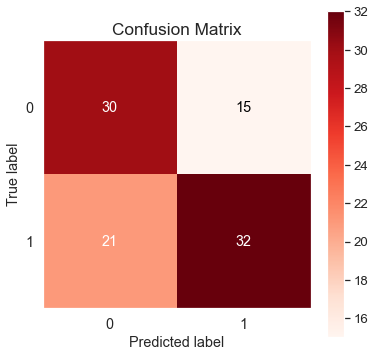

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'Reds');